<a href="https://colab.research.google.com/github/marcinmichalsmolen/adam/blob/main/MGR12_CIFAR10_POROWNANIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fri Apr 21 08:38:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    25W /  70W |    375MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

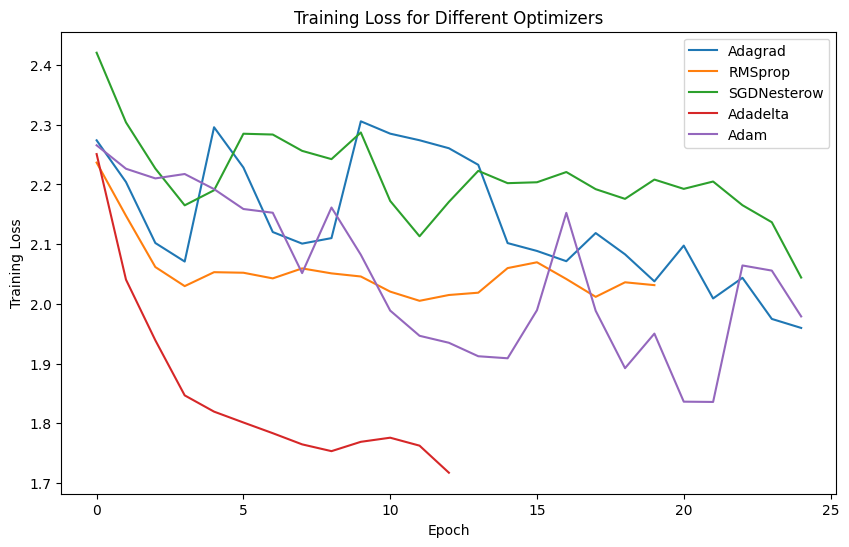

In [2]:
#@title Domyślny tekst tytułu
!nvidia-smi
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10 as dataset
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adagrad, RMSprop, SGD, Adadelta, Adam
import matplotlib.pyplot as plt

def load_data():
  (X_train, y_train), (X_test, y_test) = dataset.load_data()
#konwersja wektorów y_train i y_test do formatu one-hot
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return X_train, y_train, X_test, y_test
def normalize_pixels(tmp_train, tmp_test):
# Zamiana na zmiennoprzecinkowe
  X_train = tmp_train.astype('float32')
  X_test = tmp_test.astype('float32')
# Normalizacja
  X_train = X_train / 255.0
  X_test = X_test / 255.0
  return X_train, X_test

X_train, y_train, X_test, y_test = load_data()
X_train, X_test = normalize_pixels(X_train, X_test)

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define model with dropout
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu')),
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu')),\
    model.add(Flatten()),
    model.add(Dense(1000, activation='relu')),
    model.add(Dropout(0.5)),
    model.add(Dense(10, activation='relu')),
    return model

# Define training settings
batch_size = 128
epochs = 25
optimizer_names = ['Adagrad', 'RMSprop', 'SGDNesterow', 'Adadelta', 'Adam']
opt_adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)
opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)
opt_sgd_nesterov = tf.keras.optimizers.SGD(nesterov=True, learning_rate=0.01)
opt_adadelta = tf.keras.optimizers.Adadelta(learning_rate=1.0)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizers = [opt_adagrad, opt_rmsprop, opt_sgd_nesterov, opt_adadelta, opt_adam]

# Train models with different optimizers
history = {}
for optimizer_name, optimizer in zip(optimizer_names, optimizers):
    print(f'Training model with {optimizer_name} optimizer...')
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    history[optimizer_name] = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                                        verbose=0, validation_data=(X_test, y_test))

# Plot training loss for all models on one graph
plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['loss'], label=optimizer_name)
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()